# Exploratory Data Anlysis on Weather

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the functions I've built in Python scripts
import eda
import visualization

In [2]:
# # increase the number of characters shown for each column
pd.set_option('display.max_colwidth', 100)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Cleaning

In [3]:
weather = pd.read_csv('assets/weather.csv', 
                      parse_dates=['Date'], infer_datetime_format=True, 
                      na_values=['M', '-'])  # M = Missing Data

weather['Station'] = weather['Station'].astype('category')
    
weather.shape

(2944, 22)

In [4]:
weather.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [5]:
# Water1 does not have any useful info -- drop!
weather.drop('Water1', axis=1, inplace=True)

eda.eda(weather)

Head of the dataframe:

  Station       Date  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  Heat  Cool  \
0       1 2007-05-01    83    50  67.0    14.0        51     56.0   0.0   2.0   
1       2 2007-05-01    84    52  68.0     NaN        51     57.0   0.0   3.0   
2       1 2007-05-02    59    42  51.0    -3.0        42     47.0  14.0   0.0   
3       2 2007-05-02    60    43  52.0     NaN        42     47.0  13.0   0.0   
4       1 2007-05-03    66    46  56.0     2.0        40     48.0   9.0   0.0   

   Sunrise  Sunset CodeSum  Depth SnowFall PrecipTotal  StnPressure  SeaLevel  \
0    448.0  1849.0            0.0      0.0        0.00        29.10     29.82   
1      NaN     NaN            NaN      NaN        0.00        29.18     29.82   
2    447.0  1850.0      BR    0.0      0.0        0.00        29.38     30.09   
3      NaN     NaN   BR HZ    NaN      NaN        0.00        29.44     30.08   
4    446.0  1851.0            0.0      0.0        0.00        29.39     30.12   

  

In [6]:
# Depth does not have any variation (all zeros) -- drop!
weather.drop('Depth', axis=1, inplace=True)

In [7]:
weather.SnowFall.unique()
# Note the whitespace with T (gah!)

array(['0.0', nan, '  T', '0.1'], dtype=object)

In [9]:
weather[weather.SnowFall=='0.1']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2942,1,2014-10-31,47,33,40.0,-6.0,25,33.0,25.0,0.0,623.0,1647.0,RA SN,0.1,0.03,29.49,30.2,22.6,34,22.9


In [10]:
weather[weather.SnowFall=='  T']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
558,1,2008-08-04,87,70,79.0,6.0,68,70.0,0.0,14.0,448.0,1908.0,TS TSRA RA BR,T,2.43,29.18,29.90,3.1,18,9.0
724,1,2008-10-26,56,37,47.0,-1.0,32,41.0,18.0,0.0,617.0,1654.0,RA,T,T,29.10,29.80,17.2,27,17.8
726,1,2008-10-27,47,33,40.0,-8.0,27,35.0,25.0,0.0,618.0,1653.0,,T,T,29.51,30.20,13.7,31,14.4
1072,1,2009-10-16,45,39,42.0,-10.0,36,39.0,23.0,0.0,605.0,1709.0,RA,T,0.04,29.41,30.13,8.2,35,8.2
1514,1,2011-05-22,87,61,74.0,13.0,60,64.0,0.0,9.0,425.0,1911.0,TSRA RA BR,T,0.58,28.95,29.70,10.3,19,11.4
1550,1,2011-06-09,69,50,60.0,-6.0,52,55.0,5.0,0.0,416.0,1925.0,TSRA RA BR,T,0.93,29.28,30.00,8.0,4,12.5
1844,1,2012-05-03,86,66,76.0,22.0,65,69.0,0.0,11.0,446.0,1851.0,TS TSRA,T,1.34,29.16,29.86,10.8,21,12.0
2310,1,2013-06-21,82,68,75.0,5.0,65,68.0,0.0,10.0,416.0,1930.0,RA BR,T,0.79,29.34,30.04,7.4,19,9.5
2322,1,2013-06-27,90,64,77.0,6.0,67,70.0,0.0,12.0,418.0,1931.0,BR,T,0.92,29.01,29.73,7.2,29,7.2
2556,1,2013-10-22,42,29,36.0,-14.0,31,34.0,29.0,0.0,612.0,1660.0,RA,T,T,29.21,29.95,5.4,26,6.1


In [11]:
weather.PrecipTotal.unique()
# Note the whitespace with T

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40', '0.66',
       '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17', '0.03',
       '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29', '0.23',
       '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37', '0.88',
       '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36', '0.33',
       '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12', '0.52',
       '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61', '1.22',
       '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23', '0.62',
       '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86', '0.63',
       '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14', '1.07',
       '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61', '0.54',
  

In [12]:
# T in SnowFall and PrecipTotal means Trace
# Arbitrarily convert T to 0.001 in SnowFall/PrecipTotal so that dtype can be changed to float
weather.SnowFall = weather.SnowFall.apply(lambda x: 0.001 if x=='  T' else x).astype(np.float)
weather.PrecipTotal = weather.PrecipTotal.apply(lambda x: 0.001 if x=='  T' else x).astype(np.float)

##### Info on Station 1 and Station 2 from [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data):  
Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level  
Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [13]:
# use data as index, split the dataframe into data collected from Station 1 or Station 2
# Note that non-numerical variables will be dropped (in this case, CodeSum)
pivoted_weather = pd.pivot_table(weather, index='Date', columns='Station')
pivoted_weather.columns = [col[0] + '_' + str(col[1]) for col in pivoted_weather.columns]    
pivoted_weather.head()

,AvgSpeed_1,AvgSpeed_2,Cool_1,Cool_2,Depart_1,DewPoint_1,DewPoint_2,Heat_1,Heat_2,PrecipTotal_1,PrecipTotal_2,ResultDir_1,ResultDir_2,ResultSpeed_1,ResultSpeed_2,SeaLevel_1,SeaLevel_2,SnowFall_1,StnPressure_1,StnPressure_2,Sunrise_1,Sunset_1,Tavg_1,Tavg_2,Tmax_1,Tmax_2,Tmin_1,Tmin_2,WetBulb_1,WetBulb_2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,9.2,9.6,2.0,3.0,14.0,51,51,0.0,0.0,0.000,0.000,27,25,1.7,2.7,29.82,29.82,0.0,29.10,29.18,448.0,1849.0,67.0,68.0,83,84,50,52,56.0,57.0
2007-05-02,13.4,13.4,0.0,0.0,-3.0,42,42,14.0,13.0,0.000,0.000,4,2,13.0,13.3,30.09,30.08,0.0,29.38,29.44,447.0,1850.0,51.0,52.0,59,60,42,43,47.0,47.0
2007-05-03,11.9,13.2,0.0,0.0,2.0,40,40,9.0,7.0,0.000,0.000,7,6,11.7,12.9,30.12,30.12,0.0,29.39,29.46,446.0,1851.0,56.0,58.0,66,67,46,48,48.0,50.0
2007-05-04,10.8,10.4,0.0,NaN,4.0,41,42,7.0,NaN,0.001,0.000,8,7,10.4,10.1,30.05,30.04,0.0,29.31,29.36,444.0,1852.0,58.0,NaN,66,78,49,51,50.0,50.0
2007-05-05,12.0,11.5,0.0,0.0,5.0,38,39,5.0,5.0,0.001,0.001,7,7,11.7,11.2,30.10,30.09,0.0,29.40,29.46,443.0,1853.0,60.0,60.0,66,66,53,54,49.0,50.0


In [14]:
# check the number of missing data in each column
pivoted_weather.isnull().sum()

AvgSpeed_1        0
AvgSpeed_2        3
Cool_1            0
Cool_2           11
Depart_1          0
DewPoint_1        0
DewPoint_2        0
Heat_1            0
Heat_2           11
PrecipTotal_1     0
PrecipTotal_2     2
ResultDir_1       0
ResultDir_2       0
ResultSpeed_1     0
ResultSpeed_2     0
SeaLevel_1        5
SeaLevel_2        4
SnowFall_1        0
StnPressure_1     2
StnPressure_2     2
Sunrise_1         0
Sunset_1          0
Tavg_1            0
Tavg_2           11
Tmax_1            0
Tmax_2            0
Tmin_1            0
Tmin_2            0
WetBulb_1         3
WetBulb_2         1
dtype: int64

In [15]:
# convert Sunrise_1 and Sunset_1 to the number of hours passed since midnight (00:00 am)
def convert_timestamp(timestamp):
    hour = np.floor(timestamp/100)
    min_to_hour = (timestamp - hour * 100) / 60
    return hour + min_to_hour

pivoted_weather.Sunrise_1 = pivoted_weather.Sunrise_1.apply(convert_timestamp)
pivoted_weather.Sunset_1 = pivoted_weather.Sunset_1.apply(convert_timestamp)
pivoted_weather[['Sunrise_1', 'Sunset_1']].head()

,Sunrise_1,Sunset_1
Date,,
2007-05-01,4.800000,18.816667
2007-05-02,4.783333,18.833333
2007-05-03,4.766667,18.850000
2007-05-04,4.733333,18.866667
2007-05-05,4.716667,18.883333


In [16]:
# to-do: perform a dependent t-test (station 1 vs station 2)
# this is to validate that I can use values from one station 
# to fill the null in another station on the same day


In [17]:
fill_map ={'1':'2', '2':'1'}
# fill null values with values from the other station on the same day
for col, series in pivoted_weather.iteritems():
    for index, cell in enumerate(series):
        if pd.isnull(cell):
            # reference column is the other column
            ref_col = col[:-1] + fill_map[col[-1]]
            df_index = pivoted_weather.index[index]
            pivoted_weather.loc[df_index, col] = pivoted_weather.loc[df_index, ref_col]

# check the number of missing data in each column again
pivoted_weather.isnull().sum()

AvgSpeed_1       0
AvgSpeed_2       0
Cool_1           0
Cool_2           0
Depart_1         0
DewPoint_1       0
DewPoint_2       0
Heat_1           0
Heat_2           0
PrecipTotal_1    0
PrecipTotal_2    0
ResultDir_1      0
ResultDir_2      0
ResultSpeed_1    0
ResultSpeed_2    0
SeaLevel_1       0
SeaLevel_2       0
SnowFall_1       0
StnPressure_1    1
StnPressure_2    1
Sunrise_1        0
Sunset_1         0
Tavg_1           0
Tavg_2           0
Tmax_1           0
Tmax_2           0
Tmin_1           0
Tmin_2           0
WetBulb_1        0
WetBulb_2        0
dtype: int64

In [18]:
pivoted_weather[pivoted_weather.StnPressure_1.isnull()]

,AvgSpeed_1,AvgSpeed_2,Cool_1,Cool_2,Depart_1,DewPoint_1,DewPoint_2,Heat_1,Heat_2,PrecipTotal_1,PrecipTotal_2,ResultDir_1,ResultDir_2,ResultSpeed_1,ResultSpeed_2,SeaLevel_1,SeaLevel_2,SnowFall_1,StnPressure_1,StnPressure_2,Sunrise_1,Sunset_1,Tavg_1,Tavg_2,Tmax_1,Tmax_2,Tmin_1,Tmin_2,WetBulb_1,WetBulb_2
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-08-10,6.5,7.4,8.0,10.0,0.0,57,55,0.0,0.0,0.0,0.0,5,6,5.3,6.0,30.08,30.07,0.0,NaN,NaN,4.9,19.0,73.0,75.0,81,81,64,68,63.0,63.0


##### On 2013-08-10, no `StnPressure` info is available.  
Two options: either drop the `StnPressure_1` and `StnPressure_2` columns, or drop the row of `2013-08-10`

In [19]:
# drop columns of StnPressure_1 and StnPressure_2
weather_drop_pres = pivoted_weather.dropna(axis=1)
weather_drop_pres.shape

(1472, 28)

In [20]:
# or drop row of 2013-08-10
weather_drop_day = pivoted_weather.dropna(axis=0, subset=['StnPressure_1', 'StnPressure_2'])
weather_drop_day.shape

(1471, 30)

In [26]:
# How windy is it on spray days?
spray_dates = pd.to_datetime(['2011-08-29', '2011-09-07', '2013-07-17', 
                              '2013-07-25', '2013-08-08', '2013-08-15', 
                              '2013-08-16', '2013-08-22', '2013-08-29', 
                              '2013-09-05'])

pivoted_weather.loc[spray_dates, ['AvgSpeed_1', 'AvgSpeed_2', 
                                  'ResultDir_1', 'ResultDir_2',
                                  'ResultSpeed_1', 'ResultSpeed_2']]

,AvgSpeed_1,AvgSpeed_2,ResultDir_1,ResultDir_2,ResultSpeed_1,ResultSpeed_2
2011-08-29,3.5,4.2,2,6,1.4,1.1
2011-09-07,10.8,13.3,1,2,10.2,12.4
2013-07-17,6.9,7.1,26,25,6.7,6.2
2013-07-25,5.1,3.9,23,23,4.1,2.7
2013-08-08,9.3,10.8,5,5,8.6,10.5
2013-08-15,4.9,5.0,24,22,4.2,4.5
2013-08-16,5.2,5.8,4,7,2.8,5.0
2013-08-22,7.0,7.0,23,24,1.5,2.5
2013-08-29,4.7,4.6,10,10,3.9,4.2
2013-09-05,9.2,9.9,5,6,9.0,9.2


## Visualization

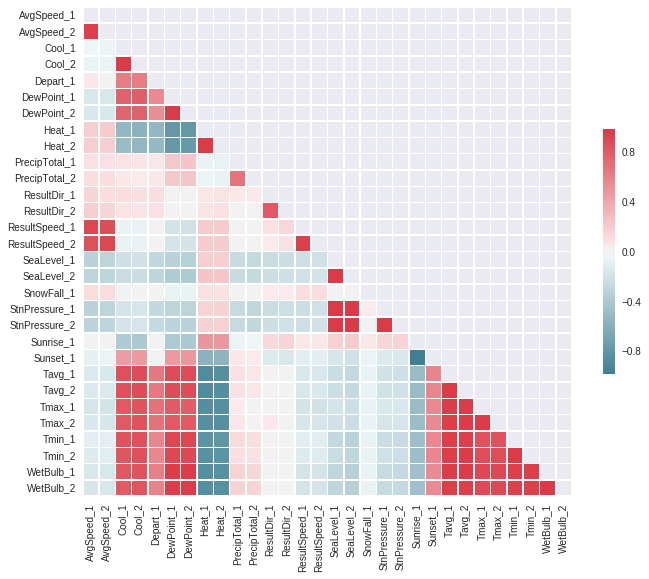

In [21]:
visualization.corr_heatmap(pivoted_weather);

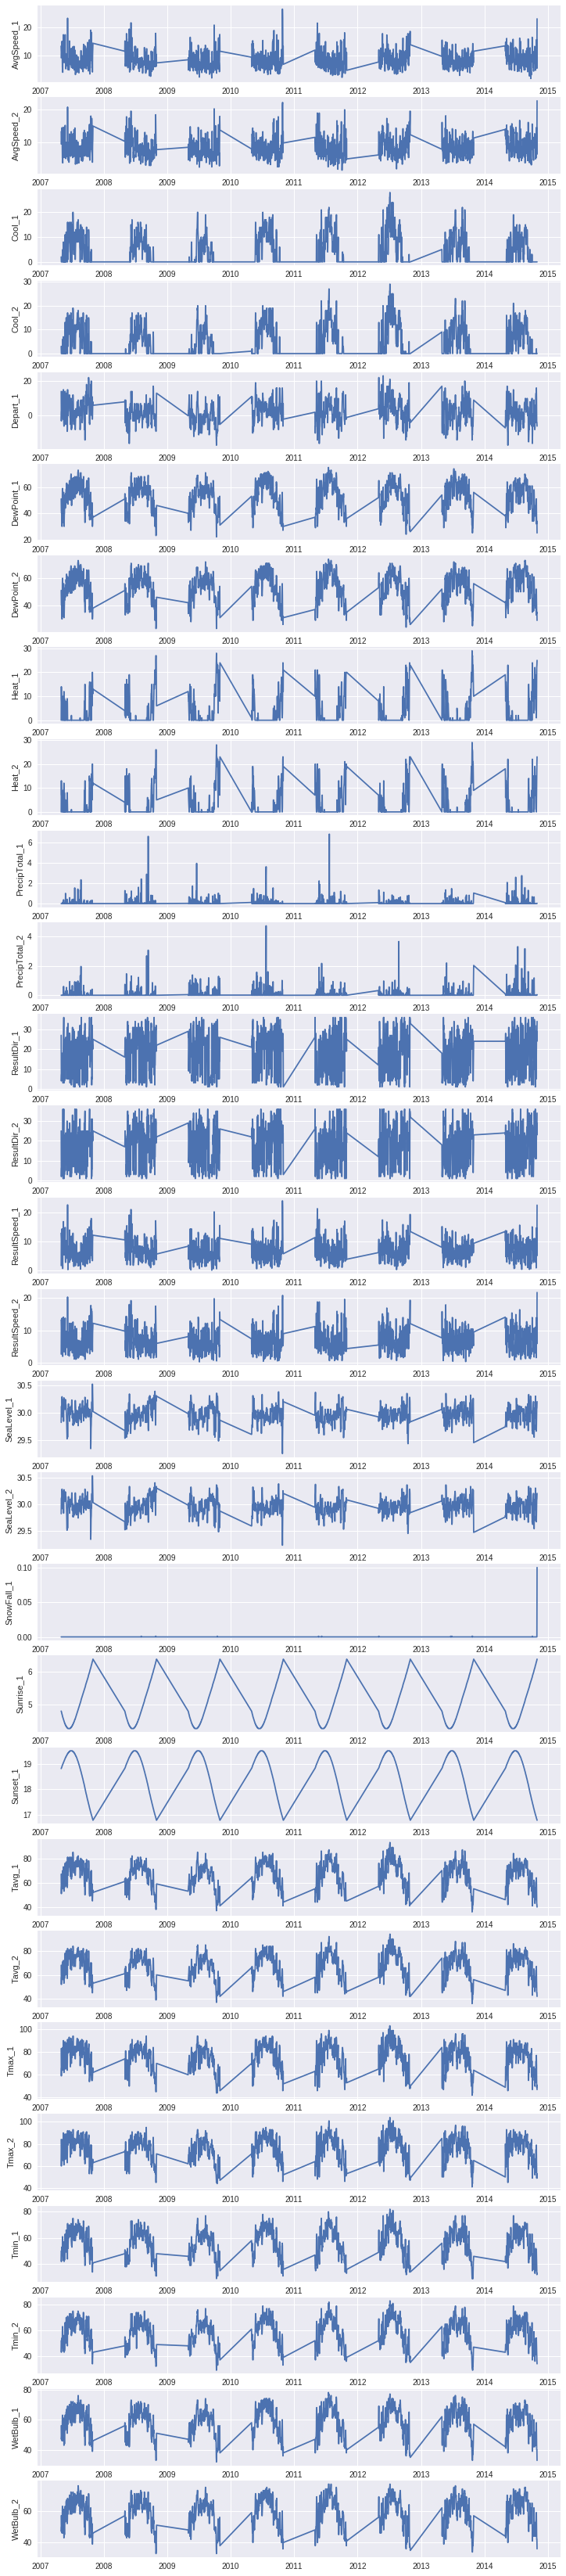

In [22]:
fig, axes = plt.subplots(nrows=len(weather_drop_pres.columns), figsize=(12, 60))
for index, col in enumerate(weather_drop_pres.columns):
    ax = axes[index]
    ax.plot(weather_drop_pres[col]);
    ax.set_ylabel(col);

In [ ]:
pivoted_weather.to_csv('assets/weather_all_features.csv')

#### `weather_all_features.csv`  has missing data (`StnPressure` columns); will decide whether to drop by row or column once all dataframes are combined.